In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../data.csv')

In [3]:
data.shape

(200000, 105)

In [4]:
data.head()

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,1,2,-587.360784,-0.331308,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.32540,2204.278945,21606.40501,16746.254820,213.098000
1,2,2,-587.359946,-0.329316,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.76938,2076.587979,17602.16397,2199.601888,506.651409
2,3,2,-587.366330,-0.324781,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.24822,497.946181,16759.45898,17687.268850,575.511247
3,4,1,-534.430563,-0.323772,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.52210,2518.506658,37359.79966,5784.140268,530.878047
4,5,2,-838.152165,-0.323753,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.77672,2971.889099,36697.28506,17496.357370,640.112190


In [5]:
data.describe()

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,2.106935,-492.668955,-0.230652,0.005855,0.187811,0.000063,0.236507,-492.622116,93.027628,...,101.999506,42.274682,562.734699,1682.573300,1906.112899,14649.117868,1829.704568,20614.768880,12255.689693,364.170122
std,57735.171256,0.728912,125.409537,0.023737,0.044903,0.036627,0.000007,0.053798,125.408955,10.997118,...,58.764821,24.420338,324.500287,970.855873,1100.541051,8471.985899,1054.248191,11907.164336,7081.965656,210.555060
min,1.000000,1.000000,-1725.106561,-0.331308,-0.220137,0.054844,0.000036,0.036167,-1725.059554,59.017874,...,0.001690,0.000805,0.009348,0.016116,0.052997,0.081641,0.008122,0.034369,0.014815,0.001187
25%,50000.750000,2.000000,-499.179990,-0.245154,-0.025577,0.163126,0.000058,0.201313,-499.132629,85.599658,...,51.277375,21.098356,282.250466,842.700608,951.465466,7303.382147,916.538284,10306.590233,6116.527229,181.891698
50%,100000.500000,2.000000,-462.054593,-0.233779,0.009641,0.187499,0.000062,0.240052,-462.009819,91.881943,...,102.089518,42.247293,561.972688,1682.636781,1908.550035,14636.804600,1831.022594,20631.912400,12271.989845,363.842076
75%,150000.250000,2.000000,-426.119354,-0.219274,0.035669,0.211735,0.000067,0.275422,-426.074170,99.303380,...,152.751834,63.414376,842.757181,2523.512481,2859.202697,22021.209500,2741.593575,30918.659795,18393.340342,546.954572
max,200000.000000,4.000000,-347.259754,-0.152657,0.100690,0.358950,0.000105,0.406642,-347.221141,153.868335,...,203.891031,84.586630,1126.213836,3363.721137,3811.360185,29336.220750,3654.013669,41193.414860,24469.070150,728.990771


In [6]:
print("number of duplicates = " + str(data.duplicated().sum()))

number of duplicates = 0


In [7]:
print(data.isna().sum())

id       0
class    0
y1       0
y2       0
y3       0
        ..
x96      0
x97      0
x98      0
x99      0
x100     0
Length: 105, dtype: int64


In [8]:
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

数据归一化

In [9]:
# 特征数据归一化
df = data.iloc[:,2:105]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0.825742,0.000000,0.743671,0.268571,0.330211,0.846464,0.825747,0.096043,0.825745,0.825747,...,0.598023,0.462670,0.149116,0.240896,0.343791,0.963291,0.603248,0.524511,0.684384,0.292318
1,0.825742,0.011147,0.749536,0.266754,0.346212,0.846168,0.825747,0.098988,0.825746,0.825747,...,0.949233,0.396394,0.728163,0.098762,0.321390,0.653995,0.568302,0.427305,0.089893,0.695003
2,0.825738,0.036533,0.761287,0.269361,0.325847,0.844102,0.825743,0.091408,0.825741,0.825743,...,0.921498,0.179466,0.132851,0.575291,0.988269,0.367471,0.136272,0.406848,0.722842,0.789463
3,0.864157,0.042181,0.925233,0.365610,0.324392,0.983353,0.864162,0.083459,0.864160,0.864162,...,0.263332,0.574095,0.213123,0.816695,0.669924,0.244764,0.689243,0.906936,0.236385,0.728237
4,0.643725,0.042285,0.565155,0.375903,0.452403,0.671481,0.643731,0.330523,0.643729,0.643731,...,0.038425,0.569818,0.435097,0.445022,0.395524,0.839228,0.813321,0.890853,0.715040,0.878080


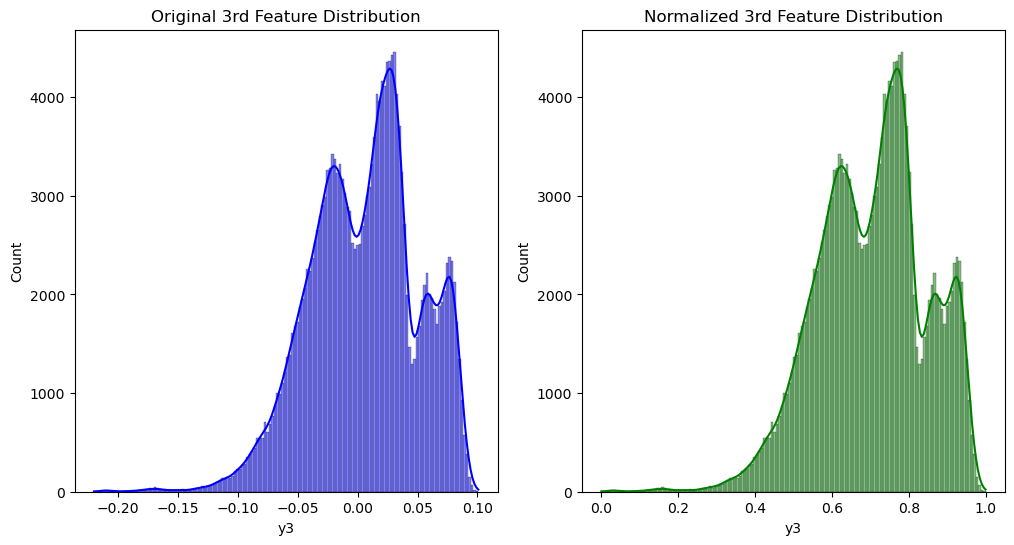

In [10]:
# 可视化归一化前后的分布（以第3列的特征为例）
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df.iloc[:, 2], kde=True, color='blue')
plt.title('Original 3rd Feature Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df_normalized.iloc[:, 2], kde=True, color='green')
plt.title('Normalized 3rd Feature Distribution')

plt.show()

数据分箱

异常值检测、数据清洗

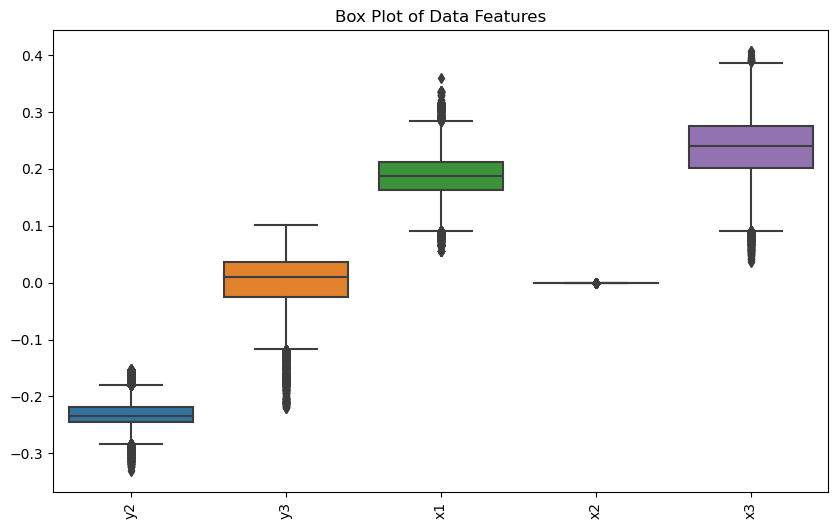

In [42]:
from scipy import stats

plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:,1:6])
plt.xticks(rotation=90)  # 如果有很多列，可以旋转x轴标签
plt.title("Box Plot of Data Features")
plt.show()

数据平滑

In [24]:
from scipy.signal import savgol_filter
def savgol_filter_data(data, window_length=11, polyorder=2):
    return savgol_filter(data, window_length=window_length, polyorder=polyorder, axis=0)
df_smooth = np.apply_along_axis(savgol_filter_data,0,df)

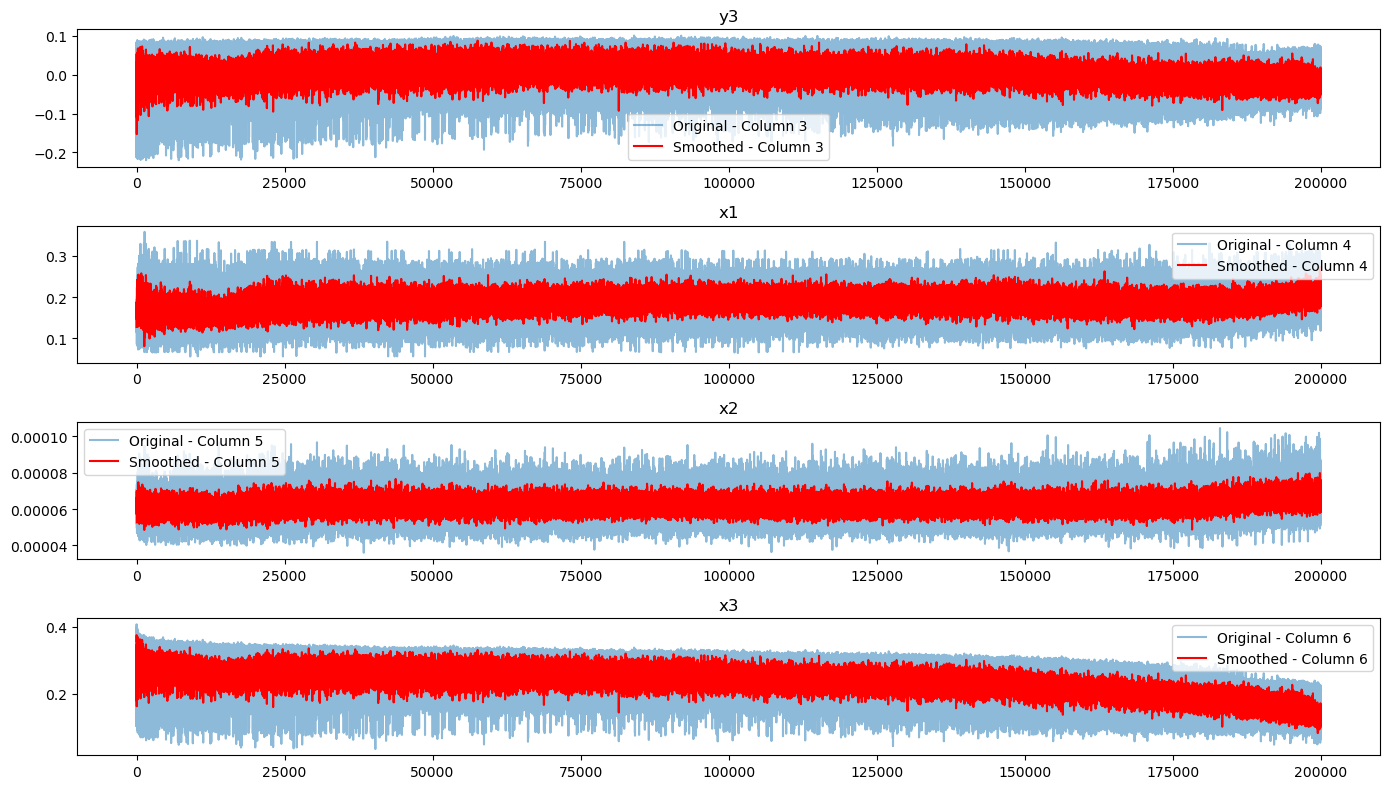

In [47]:
# 可视化原始数据和处理后的数据
plt.figure(figsize=(14, 8))

# 遍历所有列，分别绘制原始数据和处理后的数据
# for i in range(df.shape[1]):
for i in range(2,6):
    plt.subplot(4, 1, i-1)
    plt.plot(df.index, df.iloc[:, i], label=f'Original - Column {i+1}', alpha=0.5)  # 原始数据
    plt.plot(df.index, df_smooth[:, i], label=f'Smoothed - Column {i+1}', color='red')  # 处理后的数据
    plt.legend()
    plt.title(df.columns[i])  # 设置列名为标题

# 调整子图之间的间距
plt.tight_layout()
plt.show()

IQR四分位方法

In [27]:
def remove_outliers(df):
    # 对每一列进行异常值处理
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # 保留在上下界内的数据
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# 对数据框 df 的所有列应用 IQR 异常值处理
df_cleaned = remove_outliers(df)

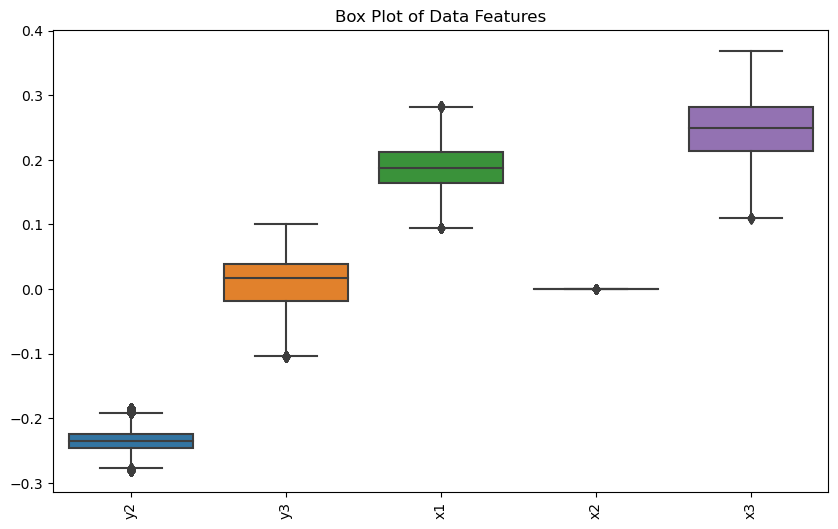

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned.iloc[:,1:6])
plt.xticks(rotation=90)  # 如果有很多列，可以旋转x轴标签
plt.title("Box Plot of Data Features")
plt.show()

In [51]:
# 应用 Savitzky-Golay 滤波器平滑数据
df_smooth1 = np.apply_along_axis(savgol_filter_data, 0, df_cleaned)

# 对平滑后的数据进行归一化
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_smooth1)

# 创建一个 DataFrame，并保留原始列名
df_normalized = pd.DataFrame(df_scaled, columns=df_cleaned.columns)

# 将归一化后的数据保存到 Excel 文件
df_normalized.to_excel('features.xlsx', index=False)